In [1]:
#Load necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
Housing_MB = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
Housing_MB.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
# exploring and understanding the dataset
print(Housing_MB.shape)
print(Housing_MB.describe())

(34857, 21)
              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771   

# Inferences
1. There are minimum of 1 room houses and maximum of 16 room houses sold in the market.Most of the houses sold have 4 rooms.
2.Most of the houses are sold are situated at an average distance of 11 kms from CBD.
3.Most of the houses sold have an average of 3 bedroom scrapped and which goes up to maximum 30 bedrooms scrapped.
4.Most of the houses sold have 2 bathrooms,2 car spots and have an average of Land Size 593 meters
5. Most of the houses sold have an average building area of 160 meters and Land size of 593 meters which can go upto maximum of 433k meters.
6. Suburbs where most of the houses sold has a average of 7k-10k properties

In [6]:
# Identifying the missing values
Housing_MB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [7]:
# Understanding variables in Suburb column
print(Housing_MB['Suburb'].value_counts())

Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
                 ... 
croydon             1
Ferny Creek         1
Yarra Glen          1
Guys Hill           1
Olinda              1
Name: Suburb, Length: 351, dtype: int64


In [8]:
# Understanding variables in Type column
print(Housing_MB['Type'].value_counts())
#Most of the houses sold are house,cottage villa or semi terrace type

h    23980
u     7297
t     3580
Name: Type, dtype: int64


In [9]:
# Understanding variables in Method column
print(Housing_MB['Method'].value_counts())

S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64


In [10]:
print(Housing_MB['CouncilArea'].value_counts())

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

In [11]:
print(Housing_MB['Regionname'].value_counts())
#Most of the houses sold are from Southern Metropolitan region

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64


In [12]:
print(Housing_MB['Suburb'].value_counts())

Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
                 ... 
croydon             1
Ferny Creek         1
Yarra Glen          1
Guys Hill           1
Olinda              1
Name: Suburb, Length: 351, dtype: int64


In [13]:
# Total Missing value for each feature
print(Housing_MB.isnull().sum())

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [14]:
# Replacing Missing values in columns where we have less than 30% missing values
Housing_MB['Bedroom2'].fillna(Housing_MB['Bedroom2'].median(),axis=0,inplace=True)
Housing_MB['Bathroom'].fillna(Housing_MB['Bathroom'].median(),axis=0,inplace=True)
Housing_MB['Car'].fillna(Housing_MB['Car'].median(),axis=0,inplace=True)
Housing_MB['Landsize'].fillna(Housing_MB['Landsize'].median(),axis=0,inplace=True)
Housing_MB['Lattitude'].fillna(Housing_MB['Lattitude'].median(),axis=0,inplace=True)
Housing_MB['Longtitude'].fillna(Housing_MB['Longtitude'].median(),axis=0,inplace=True)
Housing_MB['Regionname'].fillna(Housing_MB['Regionname'].mode(),axis=0,inplace=True)
Housing_MB['CouncilArea'].fillna(Housing_MB['CouncilArea'].mode(),axis=0,inplace=True)
Housing_MB['Propertycount'].fillna(Housing_MB['Propertycount'].median(),axis=0,inplace=True)

In [15]:
Housing_MB['Regionname'].fillna('Southern Metropolitan',inplace=True)
Housing_MB['CouncilArea'].fillna('Boroondara City Council',inplace=True)

In [16]:
# Validaing the Missing value after missing value is treated for few feature columns
print(Housing_MB.isnull().sum())

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea     21115
YearBuilt        19306
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64


In [17]:
Housing_MB['Date']= pd.to_datetime(Housing_MB['Date'],dayfirst=True)

In [18]:
# Grouping the features by Date
var = Housing_MB[Housing_MB['Type']=='h'].sort_values('Date',ascending=False).groupby('Date').std()
count = Housing_MB[Housing_MB['Type']=='h'].sort_values('Date',ascending=False).groupby('Date').count()
mean = Housing_MB[Housing_MB['Type']=='h'].sort_values('Date',ascending=False).groupby('Date').mean()

In [19]:
var

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,0.707107,NaN,1.555635,0.707107,0.707107,0.707107,1.414214,224.859956,NaN,NaN,0.008910,0.018031,1549.978064
2016-02-04,0.750604,344325.890567,3.603981,64.246074,0.536697,0.589768,1.329024,232.020797,38.148831,35.060570,0.063938,0.087514,3334.689347
2016-04-16,0.980088,640502.812588,3.416518,56.726895,0.777816,0.731632,0.872005,225.357179,72.501216,37.981012,0.053305,0.073082,4238.543163
2016-04-23,0.744174,584520.545569,3.150721,52.261970,0.709814,0.683476,0.876388,3910.605337,64.622087,36.614344,0.048867,0.068114,4864.309546
2016-05-07,0.877106,656124.147904,3.289848,57.427175,0.814099,0.635436,0.824256,409.832409,81.268812,38.044051,0.056793,0.068909,3852.138971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-17,0.848709,539474.484700,8.298314,146.234117,0.803725,0.703457,0.983363,4171.281573,68.619450,34.033694,0.101960,0.146569,4523.497466
2018-02-24,0.815114,704122.138252,7.394678,140.646907,0.789879,0.683841,0.959232,1656.077519,82.542175,38.197536,0.101519,0.132300,4243.934279
2018-03-03,0.821458,681558.639302,7.591359,128.848912,0.789028,0.686398,1.076286,1648.024392,90.008365,39.163761,0.099655,0.130381,4305.845487


In [20]:
mean

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,2.958333,1.068888e+06,10.245833,3091.083333,2.875000,1.500000,1.875000,492.458333,126.333333,1963.076923,-37.829071,144.999371,5622.791667
2016-04-16,3.271552,1.224499e+06,8.964655,3091.806034,3.073276,1.711207,1.711207,489.215517,154.068376,1942.500000,-37.804422,144.992687,7363.405172
2016-04-23,3.181818,1.087059e+06,8.721818,3078.445455,3.027273,1.572727,1.627273,827.254545,145.666667,1941.431373,-37.789526,144.982476,7364.154545
2016-05-07,3.279152,1.285205e+06,8.995760,3099.922261,3.134276,1.696113,1.731449,547.289753,166.137931,1945.369427,-37.814842,144.998985,7151.759717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-17,3.342466,1.088157e+06,14.250959,3135.021918,3.317808,1.772603,2.005479,793.252055,163.366120,1962.820513,-37.801695,144.999781,7812.706849
2018-02-24,3.421131,1.218804e+06,12.939286,3131.979167,3.410714,1.767857,2.029762,642.428571,178.378549,1961.669643,-37.797494,145.004799,7310.901786
2018-03-03,3.439065,1.237560e+06,12.985476,3126.666110,3.424040,1.794658,2.021703,639.674457,180.808824,1958.667763,-37.804493,145.005019,7417.639399


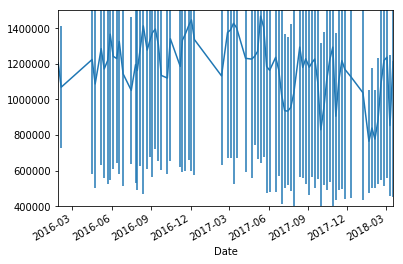

In [21]:
# Average Price marked by varaince by comparing with different date or time when the houses were sold
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))

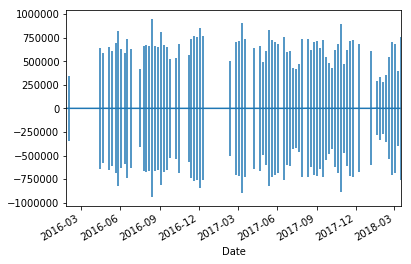

In [22]:
# Plotting average Landsize marked by variance in price
mean["Landsize"].plot(yerr=var["Price"])

In [23]:
#Group all the features by Date for the houses of type h and Distance less than 14 kms from CBD.
feature_means = Housing_MB[(Housing_MB['Type']=='h')& (Housing_MB['Distance']<14)].sort_values('Date',ascending=False).groupby('Date').mean()
feature_std = Housing_MB[(Housing_MB['Type']=='h') & (Housing_MB['Distance']<14)].sort_values('Date',ascending=False).groupby('Date').std()

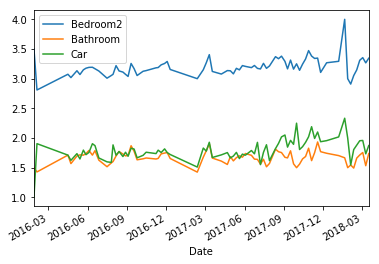

In [24]:
#Average no. of Bedroom,Bathroom,Car in Houses sold of h type and which is located within the distance of 14 kms from CBD.
feature_means[['Bedroom2','Bathroom','Car']].plot()

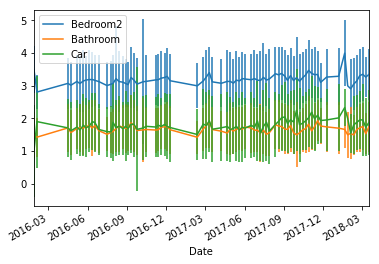

In [25]:
#Average no.of Bedroom,Bathroom,Car marked by variance in Houses sold of h type and which is located within the distance of 14 kms from CBD.
feature_means[['Bedroom2','Bathroom','Car']].plot(yerr=feature_std)

In [26]:
feature_location=Housing_MB[(Housing_MB['Type']=='h')&(Housing_MB['Distance']<14)].sort_values('Date',ascending=False).dropna().groupby(['Suburb']).mean()

In [27]:
#Group all the features by Regionname for the houses of type h and Distance less than 14 kms from CBD.
feature_region_mean=Housing_MB[(Housing_MB['Type']=='h')&(Housing_MB['Distance']<14)].sort_values('Date',ascending=False).dropna().groupby('Regionname').mean()
feature_region_std=Housing_MB[(Housing_MB['Type']=='h')&(Housing_MB['Distance']<14)].sort_values('Date',ascending=False).dropna().groupby('Regionname').std()

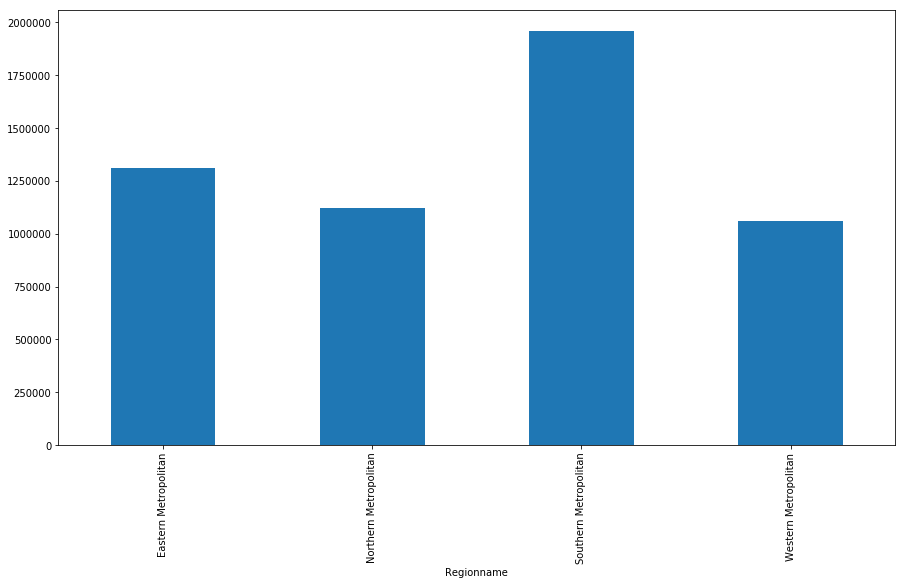

In [28]:
# Plotting the avrega eprice of house sold by Regionname
feature_region_mean['Price'].plot(kind='bar',figsize =(15,8))

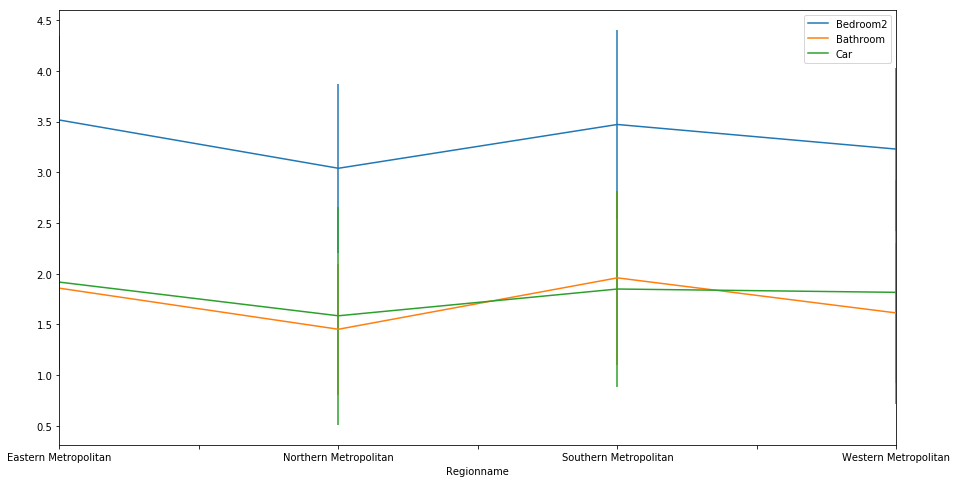

In [29]:
# Plotting the average no.of Bathroom,Bedroom and Carspots by Regionname
feature_region_mean[['Bedroom2','Bathroom','Car']].plot(yerr=feature_region_std,figsize=(15,8))

In [30]:
# Looking at the average price range in suburb for houses sold in Southern Metropolitan
feature_SouthernM = Housing_MB[(Housing_MB['Regionname']=='Southern Metropolitan')& 
                               (Housing_MB['Type']=='h') & 
                                (Housing_MB['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').mean()

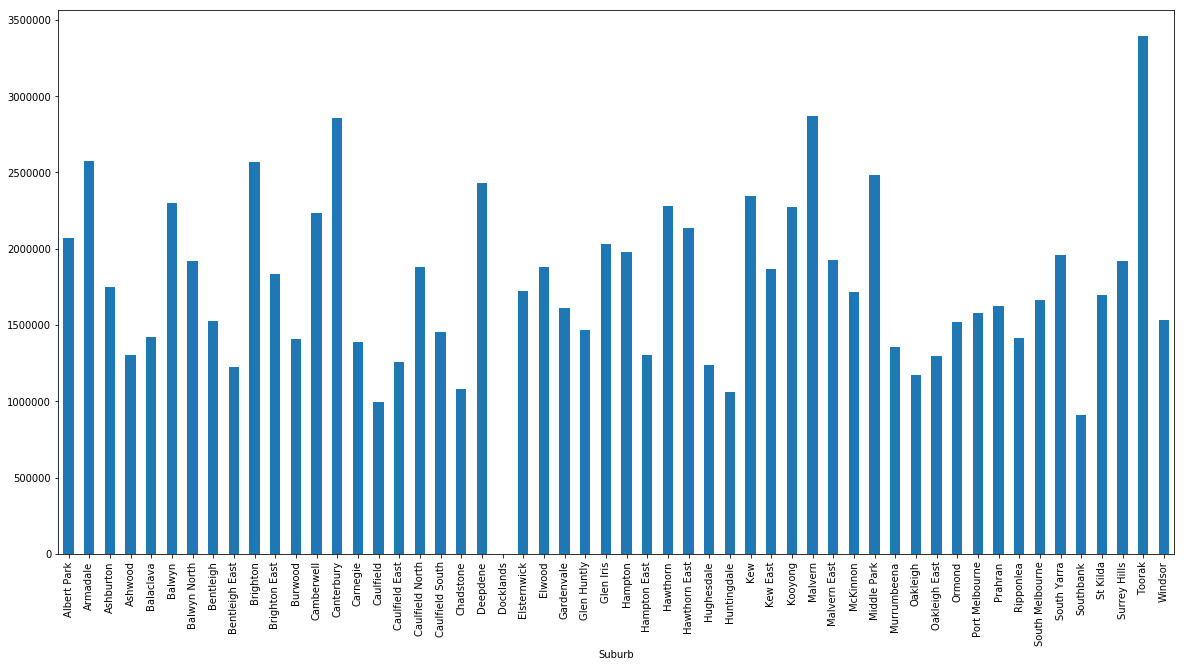

In [31]:
feature_SouthernM['Price'].plot(kind='bar',figsize=(20,10))

In [32]:
#Analyzing Average no. of rooms and Distance for each of the Suburb in Southern Metropolitan Region
feature_South_Suburb = Housing_MB[(Housing_MB['Regionname']=='Southern Metropolitan')& 
                               (Housing_MB['Type']=='h') & 
                                (Housing_MB['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').agg({'Rooms':'median','Distance':'mean'})

In [33]:
feature_South_Suburb

,Rooms,Distance
Suburb,,
Albert Park,3.0,3.182051
Armadale,3.0,6.300000
Ashburton,3.0,10.665672
Ashwood,3.0,11.355556
Balaclava,3.0,6.480000
Balwyn,4.0,8.908621
Balwyn North,4.0,9.422992
Bentleigh,4.0,12.230601
Bentleigh East,3.0,13.852161


In [34]:
#Analyzing Average no. of rooms and Distance for each of the Suburb in Western Metropolitan Region
feature_West_Suburb = Housing_MB[(Housing_MB['Regionname']=='Western Metropolitan')& 
                               (Housing_MB['Type']=='h') & 
                                (Housing_MB['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').agg({'Rooms':'median','Distance':'mean'})

In [35]:
feature_West_Suburb

,Rooms,Distance
Suburb,,
Aberfeldie,4,8.340678
Airport West,3,11.750495
Albanvale,3,14.000000
Albion,3,12.126087
Altona,3,12.304110
Altona North,3,10.406923
Ardeer,3,12.800000
Ascot Vale,3,5.204348
Avondale Heights,3,10.038462


In [36]:
# Looking at the average price range in suburb for houses sold in Western Metropolitan
feature_WesternM = Housing_MB[(Housing_MB['Regionname']=='Western Metropolitan')& 
                               (Housing_MB['Type']=='h') & 
                                (Housing_MB['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').mean()

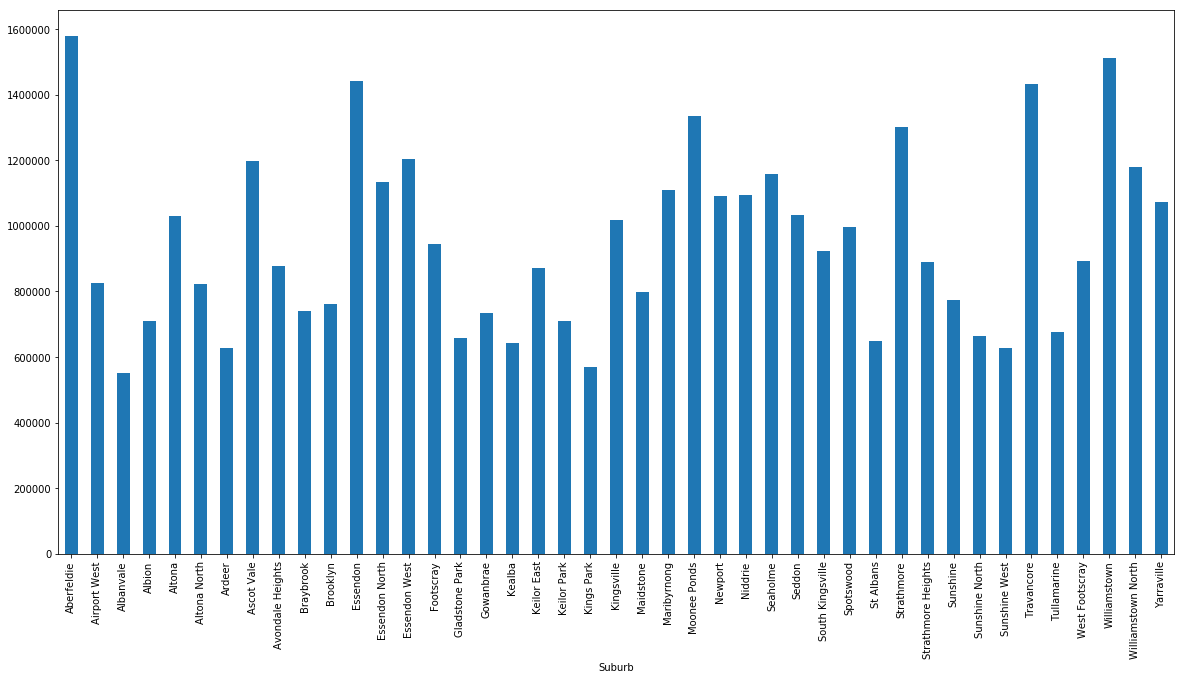

In [37]:
feature_WesternM['Price'].plot(kind='bar',figsize=(20,10))

In [38]:
# Looking at the average price range in suburb for 2 bedroom houses located in the distance of less than 5 kms from CBD sold in Southern Metropolitan 
# Anlyzing the affordable price in the suburbs.
Southern_affordable = Housing_MB[(Housing_MB['Regionname']=='Southern Metropolitan')&
                                (Housing_MB['Rooms']==2)&
                                (Housing_MB['Type']=='h')&
                                (Housing_MB['Distance']<=5)].sort_values('Date',ascending=False).groupby('Suburb').mean()

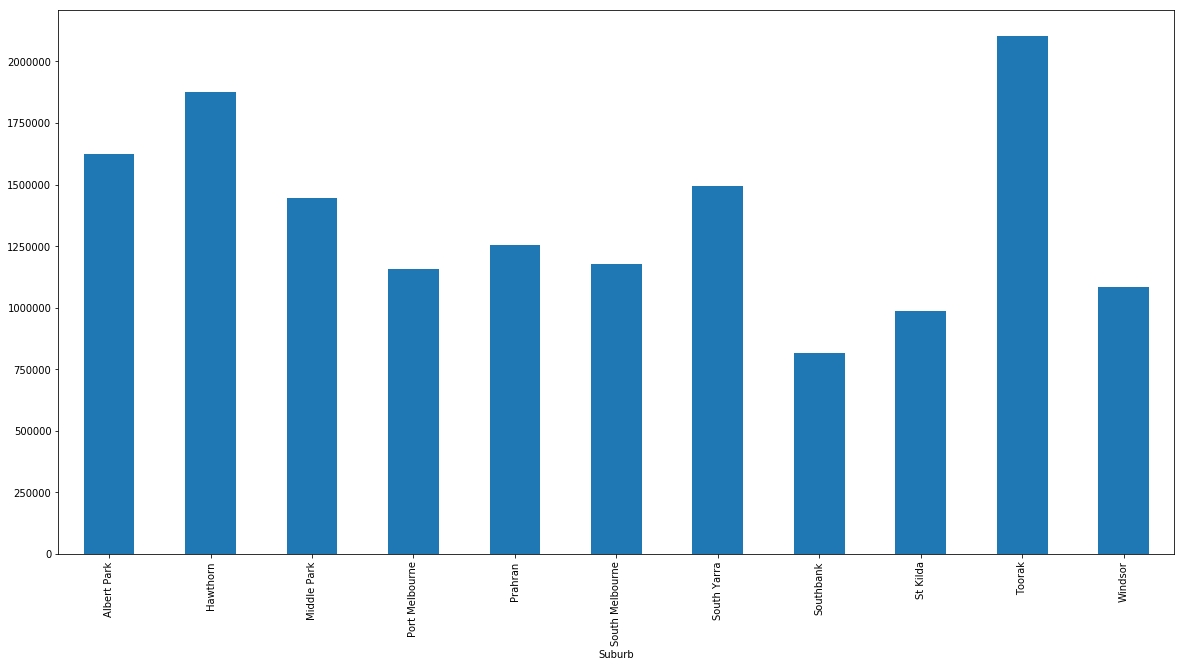

In [39]:
Southern_affordable['Price'].plot(kind='bar',figsize=(20,10))

In [40]:
# Looking at the average price range in suburb for 2 bedroom houses located in the distance of less than 5 kms from CBD sold in Southern Metropolitan 
# Anlyzing the affordable price in the suburbs.
Western_affordable = Housing_MB[(Housing_MB['Regionname']=='Western Metropolitan')&
                                (Housing_MB['Rooms']==2)&
                                (Housing_MB['Type']=='h')&
                                (Housing_MB['Distance']<=6)].sort_values('Date',ascending=False).groupby('Suburb').mean()

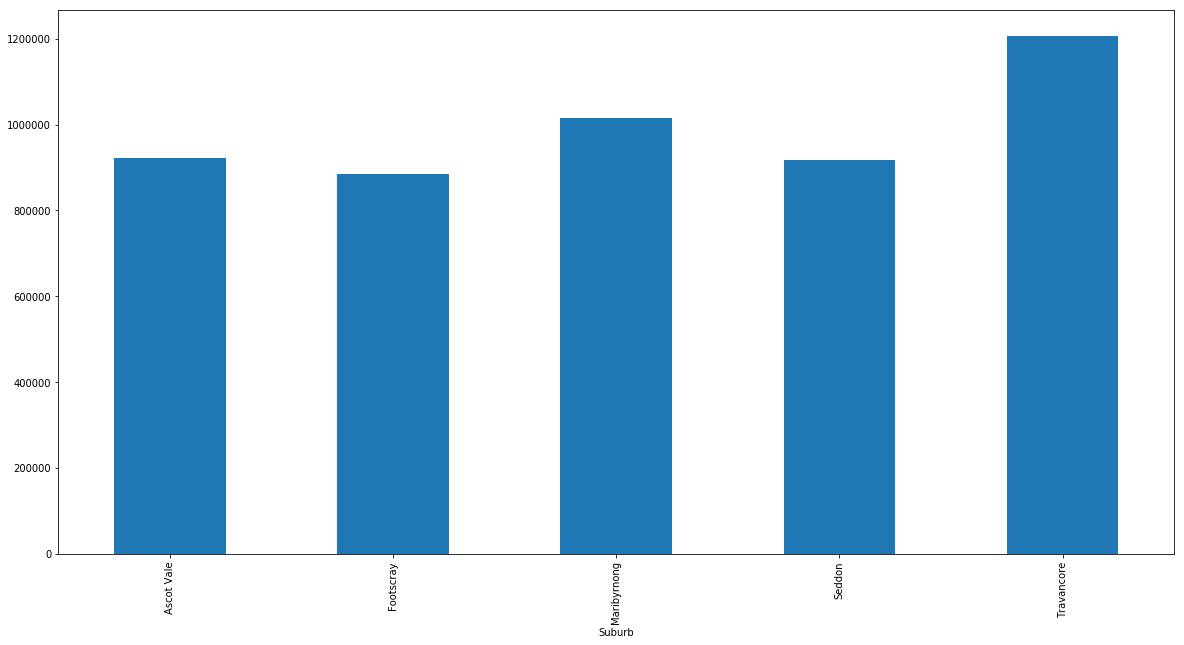

In [41]:
Western_affordable['Price'].plot(kind='bar',figsize=(20,10))

C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


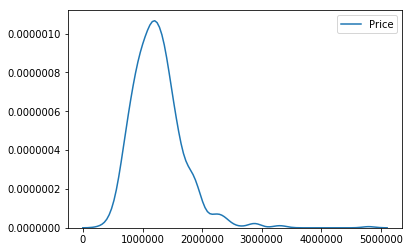

In [42]:
sns.kdeplot(Housing_MB[(Housing_MB['Regionname']=='Southern Metropolitan')
                       &(Housing_MB['Type']=='h')
                       &(Housing_MB['Rooms']==2)]
                       ["Price"])

C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


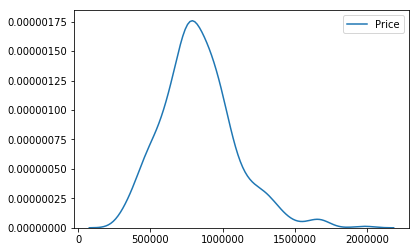

In [43]:
sns.kdeplot(Housing_MB[(Housing_MB['Regionname']=='Western Metropolitan')
                       &(Housing_MB['Type']=='h')
                       &(Housing_MB['Rooms']==2)]["Price"])

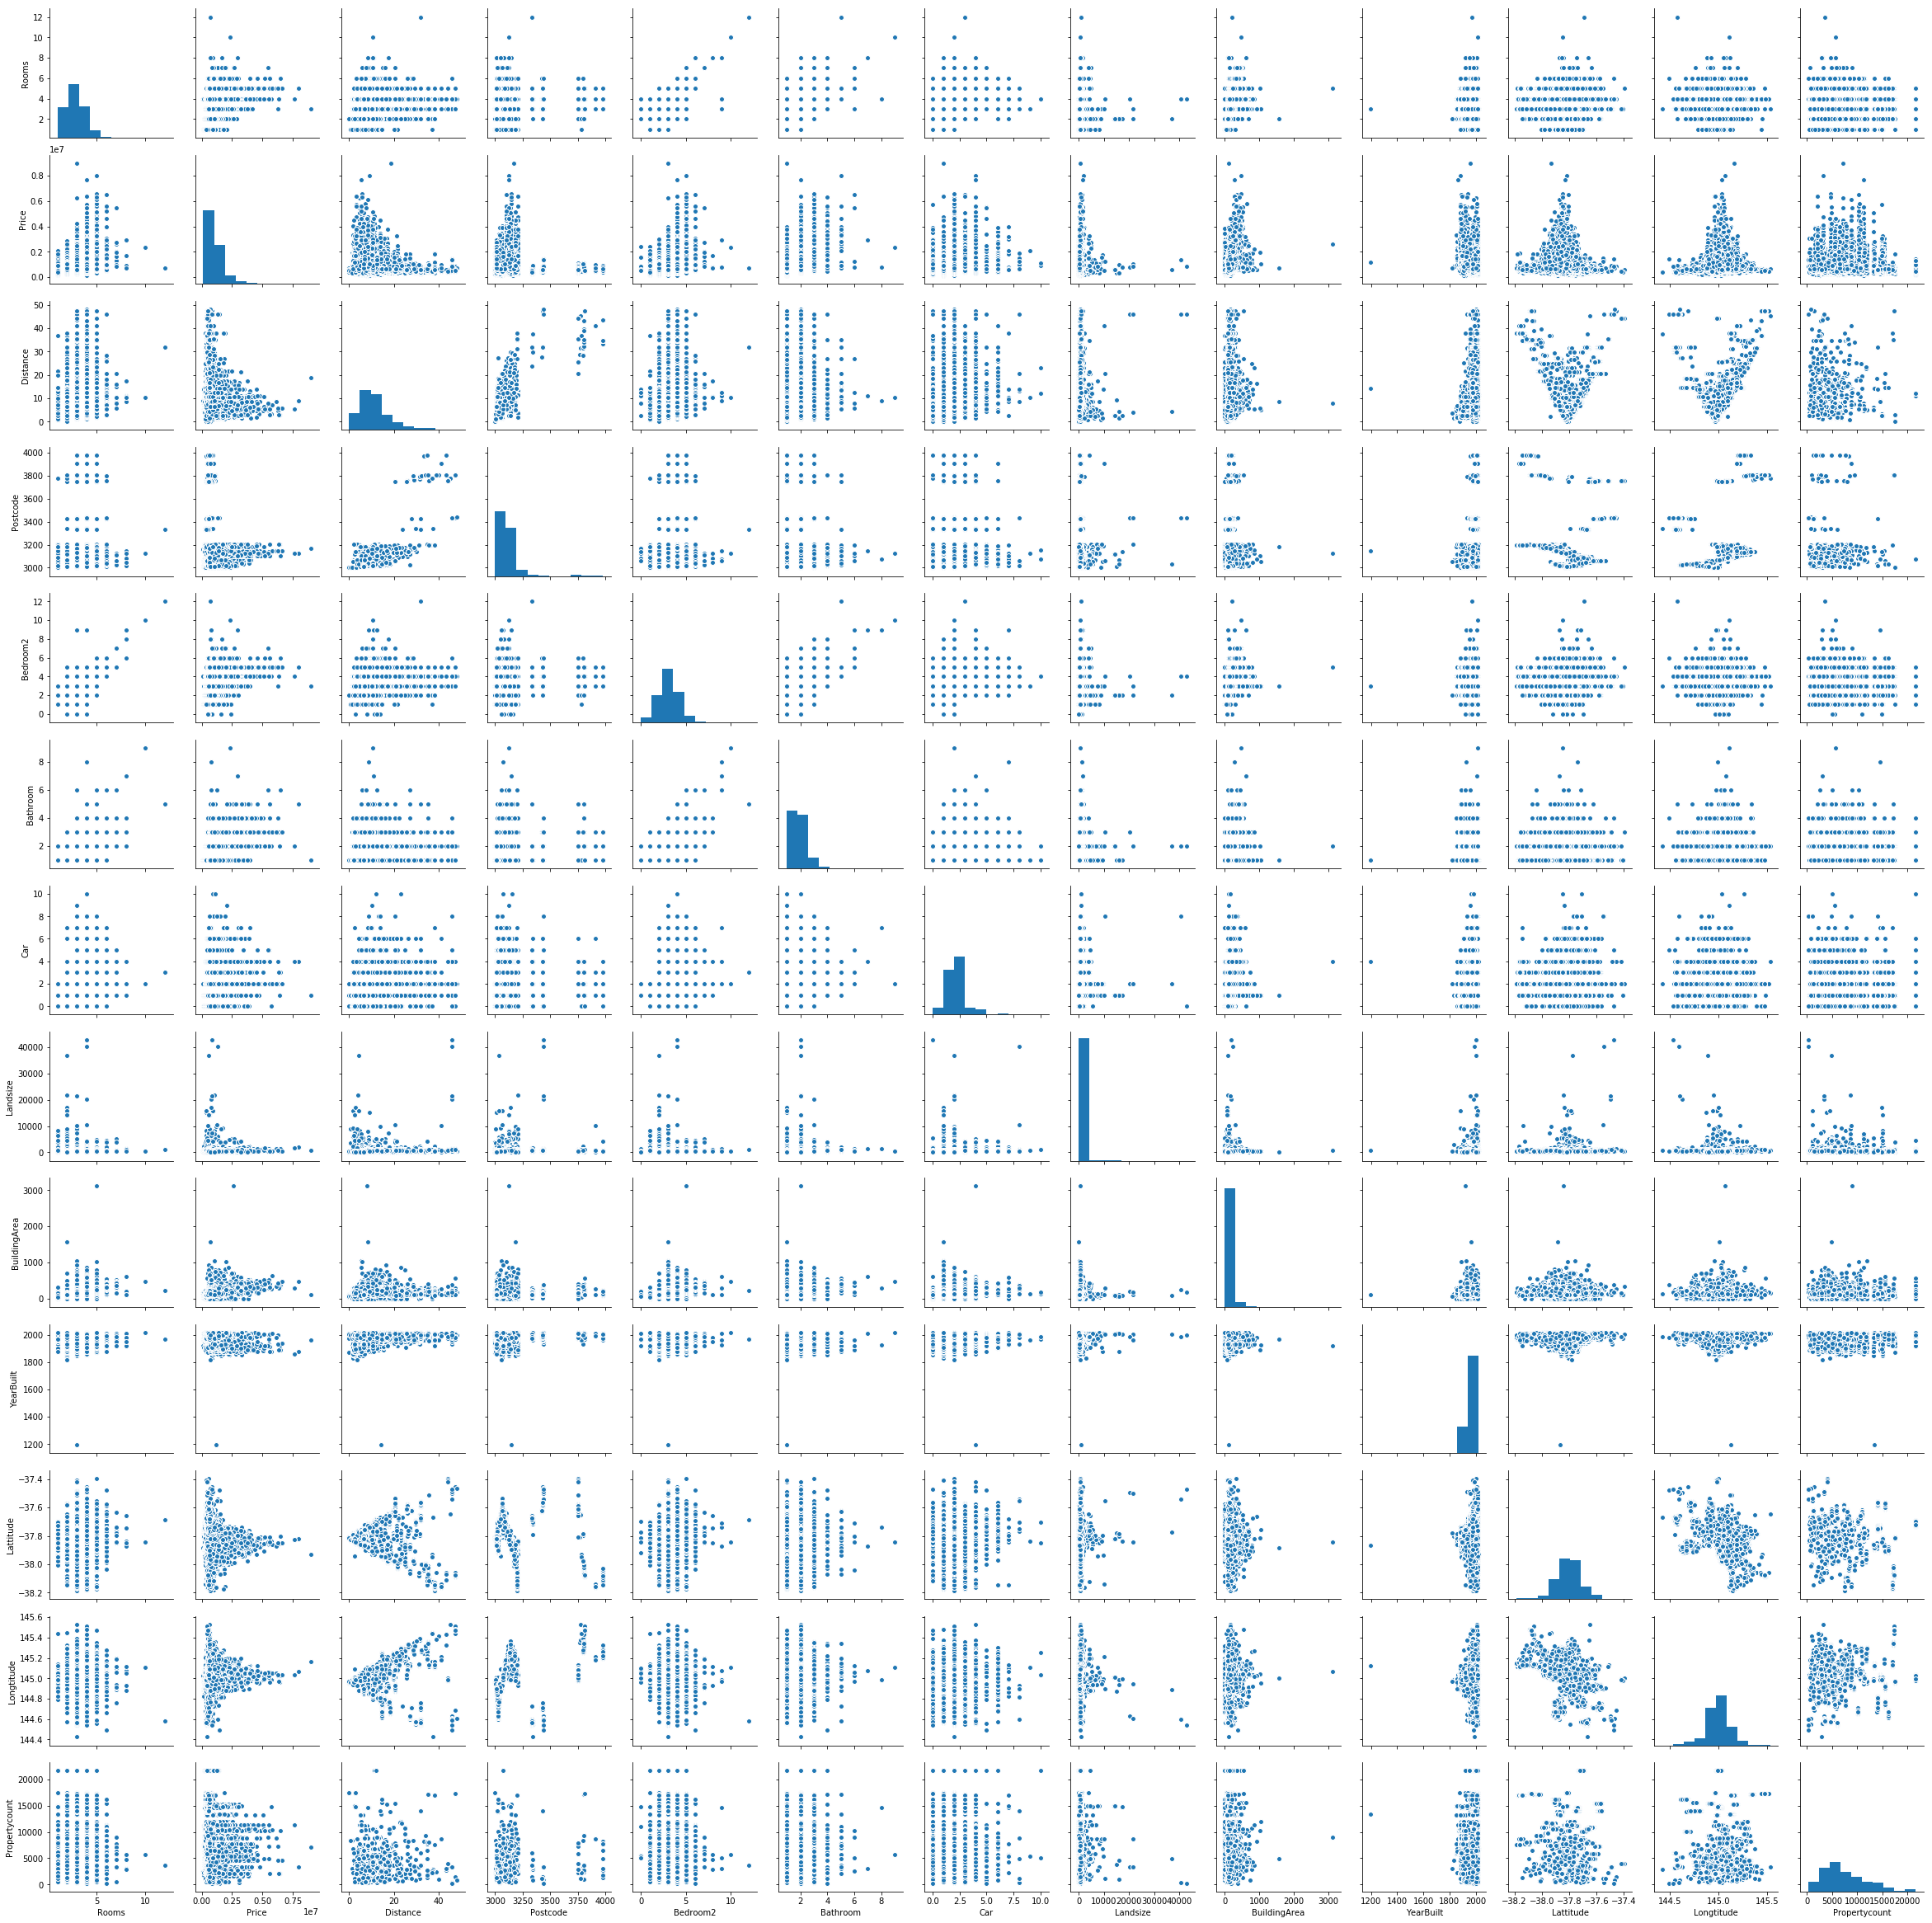

In [44]:
# Plotting the pairplot to understand the distribution and relationship between features
sns.pairplot(Housing_MB.dropna())

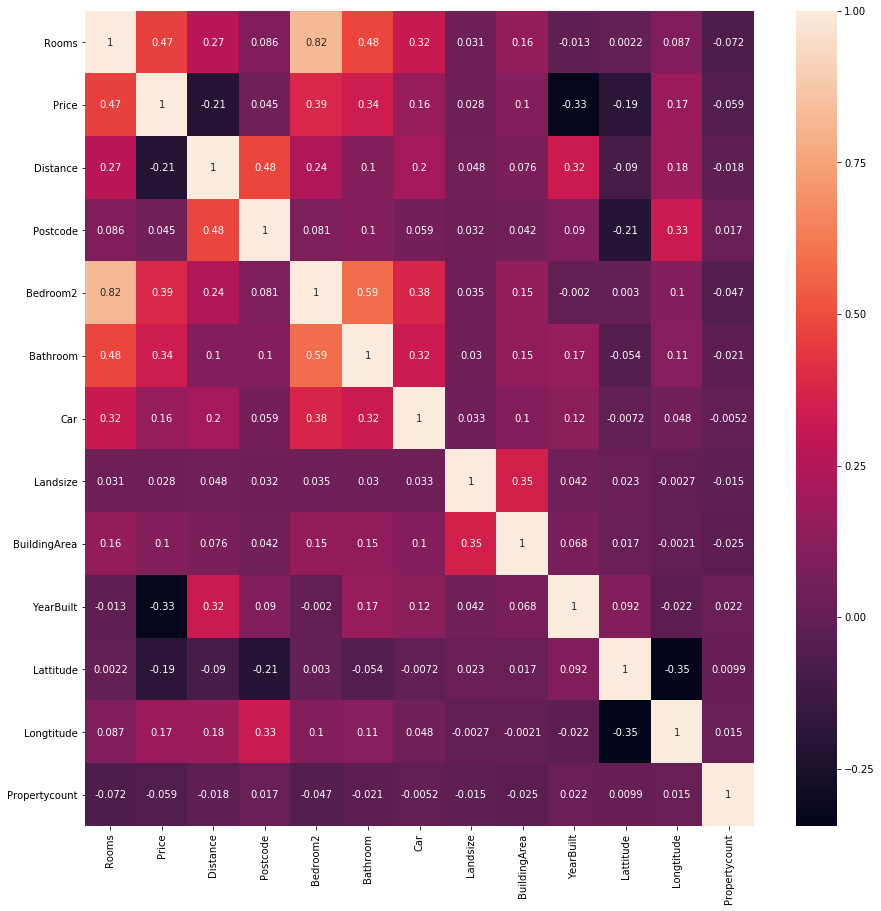

In [45]:
# Plotting the heatmap to understand the features correlation
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(Housing_MB.corr(),annot=True)

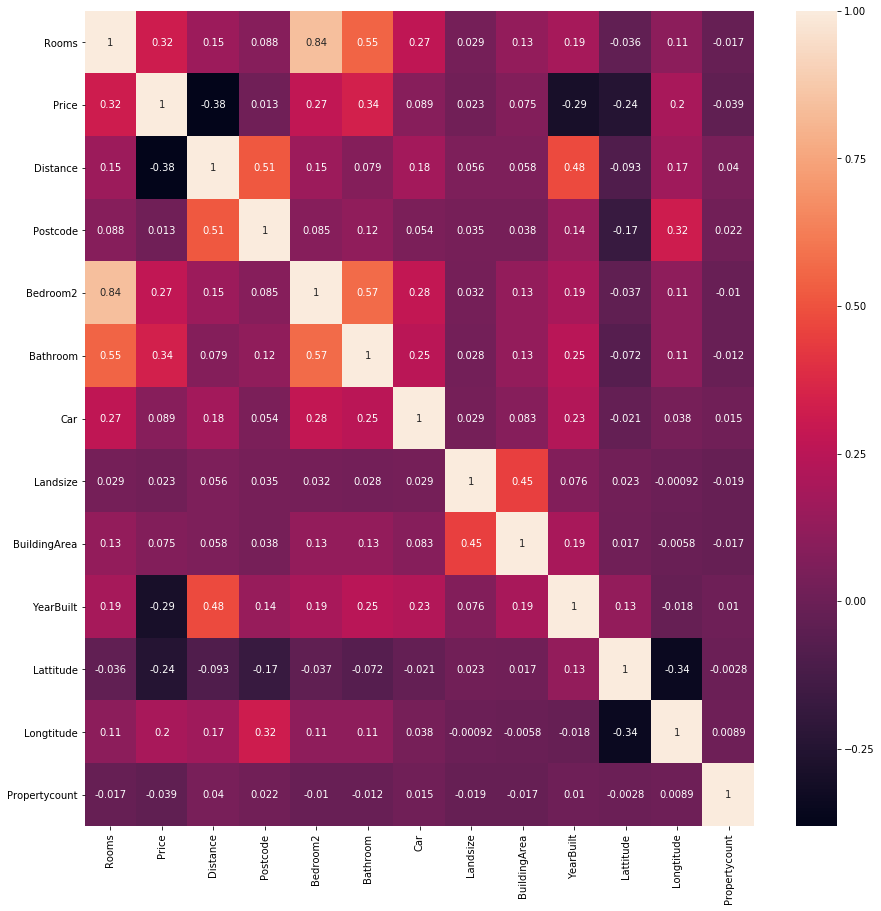

In [46]:
# Plotting the heatmap to understand the features correlation for houses sold of type h
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(Housing_MB[Housing_MB['Type']=='h'].corr(),annot=True)

In [47]:
#Drop Null values from dataframe
dataframe_Housing = Housing_MB.dropna().sort_values('Date')

In [48]:
# Convert the date column to number of days from the date when the house is sold
from datetime import date
days_since_start = [(x-dataframe_Housing['Date'].min()).days for x in dataframe_Housing['Date']]
dataframe_Housing['Days']= days_since_start

In [49]:
# Dropping columns which has less correlation to target variable(Price)
df_Housing=dataframe_Housing.drop(['Date','Address','SellerG','Postcode','Landsize','Propertycount'],axis=1)

In [50]:
# understanding the dattyoes from the Housing data frame
df_Housing.dtypes

Suburb           object
Rooms             int64
Type             object
Price           float64
Method           object
Distance        float64
Bedroom2        float64
Bathroom        float64
Car             float64
BuildingArea    float64
YearBuilt       float64
CouncilArea      object
Lattitude       float64
Longtitude      float64
Regionname       object
Days              int64
dtype: object

In [51]:
df_Housing['CouncilArea'].value_counts()

Boroondara City Council           890
Darebin City Council              811
Moreland City Council             726
Moonee Valley City Council        605
Glen Eira City Council            576
Maribyrnong City Council          547
Melbourne City Council            531
Brimbank City Council             497
Banyule City Council              489
Hume City Council                 476
Bayside City Council              413
Port Phillip City Council         381
Yarra City Council                367
Monash City Council               350
Hobsons Bay City Council          323
Stonnington City Council          310
Whittlesea City Council           302
Manningham City Council           301
Kingston City Council             256
Wyndham City Council              215
Whitehorse City Council           149
Melton City Council               142
Maroondah City Council            141
Knox City Council                 120
Frankston City Council            106
Greater Dandenong City Council     66
Casey City C

In [52]:
# Convertig Object columns to dummies
df_dummies = pd.get_dummies(df_Housing[['Type','Method','CouncilArea','Regionname']])

In [53]:
df_Housing.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Days'],
      dtype='object')

In [54]:
#Dropping the old columns which have been converted to dummies and creating a new dataframe
df_Housing.drop(['Suburb','Type','Method','CouncilArea','Regionname'],axis=1,inplace=True)
df_Housing=df_Housing.join(df_dummies)

In [55]:
df_Housing.head(5)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,Longtitude,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1035000.0,2.5,2.0,1.0,0.0,79.0,1900.0,-37.8079,144.9934,...,1,0,0,0,1,0,0,0,0,0
10256,2,805000.0,6.5,2.0,1.0,2.0,95.0,2009.0,-37.7536,144.9825,...,0,0,0,0,1,0,0,0,0,0
2516,3,1755000.0,11.7,3.0,1.0,1.0,145.0,1970.0,-37.8540,145.1195,...,0,0,0,0,0,0,0,1,0,0
3962,3,911000.0,8.0,3.0,2.0,2.0,98.0,2008.0,-37.7454,144.8987,...,0,0,0,0,0,0,0,0,1,0
6526,3,560000.0,8.7,3.0,2.0,2.0,115.0,2004.0,-37.7746,144.8798,...,0,0,0,0,0,0,0,0,1,0


In [56]:
# Splitting indepnedent and dependent features into X and y
from sklearn.cross_validation import train_test_split
X= df_Housing.drop(['Price'],axis=1)
y= df_Housing['Price']

C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [58]:
# Train the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
print(lm.intercept_)

-4782251.5749848075


In [60]:
lm.score(X_test, y_test)

0.6989746282000362

In [64]:
# Arriving at the coeffecient for the features
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

,Coefficient
CouncilArea_Stonnington City Council,5.281175e+05
CouncilArea_Boroondara City Council,4.927752e+05
CouncilArea_Bayside City Council,4.000941e+05
CouncilArea_Macedon Ranges Shire Council,2.895785e+05
Regionname_Western Victoria,2.883612e+05
CouncilArea_Mitchell Shire Council,2.728543e+05
Regionname_Northern Victoria,2.688672e+05
CouncilArea_Port Phillip City Council,2.066653e+05
Type_h,1.971770e+05
Bathroom,1.717825e+05


In [65]:
predictions =lm.predict(X_test)

(200000, 1000000)

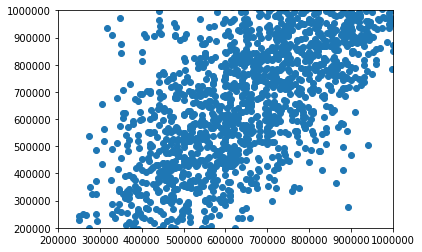

In [83]:
# Plotting a scatter plot with Predicted and Actual Values based on the trained model
plt.scatter(y_test,predictions)
plt.ylim([200000,1000000])
plt.xlim([200000,1000000])